In [2]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-07-20 03:33:58--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.214.100, 172.217.214.101, 172.217.214.113, ...
Connecting to drive.google.com (drive.google.com)|172.217.214.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-07-20 03:33:58--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.200.132, 2607:f8b0:4001:c16::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.200.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M   110MB/s    in 0.2s    

2025-07-20 03

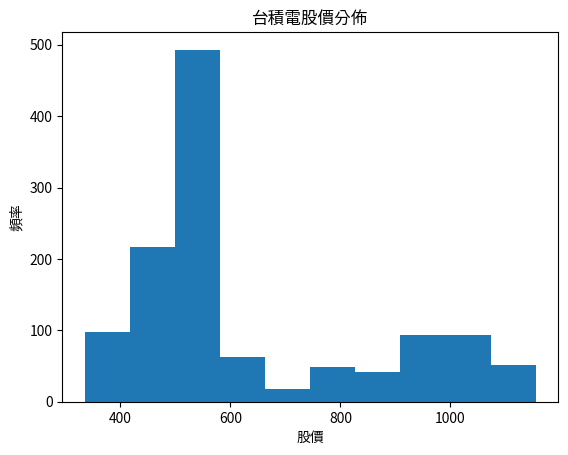

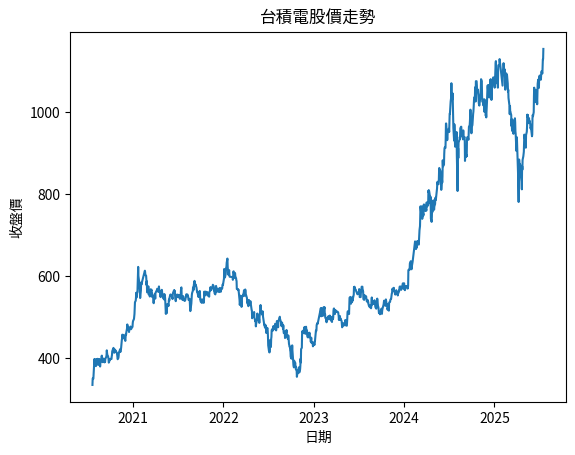

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")

# 數據處理
hist.index = pd.to_datetime(hist.index)
hist['5d_ma'] = hist['Close'].rolling(window=5).mean()
hist['20d_ma'] = hist['Close'].rolling(window=20).mean()

# 股價區間劃分
num_bins = 10
min_price = hist['Close'].min()
max_price = hist['Close'].max()
bin_width = (max_price - min_price) / num_bins
bins = [min_price + i * bin_width for i in range(num_bins + 1)]
plt.hist(hist['Close'], bins=bins)
plt.xlabel('股價')
plt.ylabel('頻率')
plt.title('台積電股價分佈')
plt.show()

# 繪製股價走勢圖
plt.plot(hist['Close'])
plt.xlabel('日期')
plt.ylabel('收盤價')
plt.title('台積電股價走勢')
plt.show()

# 步驟一:計算股價區間

子步驟1: 股價最高最低值

In [4]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")

# 取得股價的最高值和最低值
最高值 = hist['Close'].max()
最低值 = hist['Close'].min()

# 取得最高值和最低值的時間點
最高時間點 = hist['Close'].idxmax()
最低時間點 = hist['Close'].idxmin()

print(f"最高值：{最高值}，時間點：{最高時間點}")
print(f"最低值：{最低值}，時間點：{最低時間點}")

最高值：1155.0，時間點：2025-07-18 00:00:00+08:00
最低值：335.50396728515625，時間點：2020-07-20 00:00:00+08:00


In [5]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")

# 顯示歷史股價的收盤價
print(hist['Close'])

Date
2020-07-20 00:00:00+08:00     335.503967
2020-07-21 00:00:00+08:00     351.087402
2020-07-22 00:00:00+08:00     352.004120
2020-07-23 00:00:00+08:00     349.712433
2020-07-24 00:00:00+08:00     353.837463
                                ...     
2025-07-14 00:00:00+08:00    1095.000000
2025-07-15 00:00:00+08:00    1110.000000
2025-07-16 00:00:00+08:00    1130.000000
2025-07-17 00:00:00+08:00    1130.000000
2025-07-18 00:00:00+08:00    1155.000000
Name: Close, Length: 1216, dtype: float64


子步驟2：計算區間長度

In [6]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")

# 計算區間長度
interval_length = len(hist)

# 顯示區間長度
print("區間長度：", interval_length)

區間長度： 1216


子步驟3：產生股價區間

In [7]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")
max_price = hist['High'].max()
min_price = hist['Low'].min()
print(f"最大股價: {max_price}, 最小股價: {min_price}")
m = 5  # 區間數量
interval_length = (max_price - min_price) / m
print(f"區間長度: {interval_length}")
intervals = [(min_price + i * interval_length, min_price + (i + 1) * interval_length) for i in range(m)]
print(f"股價區間: {intervals}")
h_time = 10  # 買入後持有的天數
buy_sell_pairs = []

for i in range(len(hist) - h_time):
    buy_price = hist['Close'].iloc[i]
    sell_price = hist['Close'].iloc[i + h_time]
    buy_sell_pairs.append((buy_price, sell_price))

print(f"買賣價序對: {buy_sell_pairs}")

profit_pairs = [(buy, sell - buy) for buy, sell in buy_sell_pairs]
print(f"利潤序對: {profit_pairs}")


最大股價: 1160.0, 最小股價: 332.2955960133037
區間長度: 165.54088079733927
股價區間: [(332.2955960133037, 497.8364768106429), (497.8364768106429, 663.3773576079823), (663.3773576079823, 828.9182384053215), (828.9182384053215, 994.4591192026608), (994.4591192026608, 1160.0)]
買賣價序對: [(np.float64(335.50396728515625), np.float64(381.3377990722656)), (np.float64(351.08740234375), np.float64(390.0462341308594)), (np.float64(352.0041198730469), np.float64(393.25457763671875)), (np.float64(349.7124328613281), np.float64(398.754638671875)), (np.float64(353.83746337890625), np.float64(396.92132568359375)), (np.float64(389.1295471191406), np.float64(399.2129821777344)), (np.float64(398.754638671875), np.float64(393.25457763671875)), (np.float64(386.83782958984375), np.float64(384.0877685546875)), (np.float64(397.83795166015625), np.float64(393.25457763671875)), (np.float64(390.0462341308594), np.float64(391.4212341308594)), (np.float64(381.3377990722656), np.float64(398.754638671875)), (np.float64(390.0462341308

In [8]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")

# 計算區間長度
interval_length = len(hist)

# 產生股價區間
stock_intervals = hist['Close'].resample('W').mean()

# 顯示股價區間
print(stock_intervals)

Date
2020-07-26 00:00:00+08:00     348.429077
2020-08-02 00:00:00+08:00     392.521240
2020-08-09 00:00:00+08:00     392.062915
2020-08-16 00:00:00+08:00     392.246228
2020-08-23 00:00:00+08:00     391.421234
                                ...     
2025-06-22 00:00:00+08:00    1043.000000
2025-06-29 00:00:00+08:00    1059.000000
2025-07-06 00:00:00+08:00    1081.000000
2025-07-13 00:00:00+08:00    1090.000000
2025-07-20 00:00:00+08:00    1124.000000
Freq: W-SUN, Name: Close, Length: 261, dtype: float64


# 步驟二：產生利潤序對

In [9]:
!pip install yfinance
import yfinance as yf # imports the yfinance module and assigns it to the variable yf

ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")

In [10]:
interval_length = len(hist)
stock_intervals = hist['Close'].resample('W').mean()
print(stock_intervals)


Date
2020-07-26 00:00:00+08:00     348.429071
2020-08-02 00:00:00+08:00     392.521240
2020-08-09 00:00:00+08:00     392.062891
2020-08-16 00:00:00+08:00     392.246259
2020-08-23 00:00:00+08:00     391.421210
                                ...     
2025-06-22 00:00:00+08:00    1043.000000
2025-06-29 00:00:00+08:00    1059.000000
2025-07-06 00:00:00+08:00    1081.000000
2025-07-13 00:00:00+08:00    1090.000000
2025-07-20 00:00:00+08:00    1124.000000
Freq: W-SUN, Name: Close, Length: 261, dtype: float64


In [32]:
# 設定買入和賣出時間
buy_time = 10  # 買入 10 天後賣出

# 確保 interval_length 是整數
interval_length = int(len(stock_intervals))

# 產生買賣訊號列表
buy_signals = []
sell_signals = []

# 確保範圍內不超過索引長度
for i in range(max(interval_length - buy_time, 0)):
    if stock_intervals.iloc[i] < stock_intervals.iloc[i + buy_time]:
        buy_signals.append(i)
    elif stock_intervals.iloc[i] > stock_intervals.iloc[i + buy_time]:
        sell_signals.append(i)

# 顯示買賣訊號
print("買入信號:", buy_signals)
print("賣出信號:", sell_signals)


買入信號: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 27, 35, 41, 42, 43, 44, 48, 49, 50, 52, 55, 56, 57, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 99, 100, 102, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 242, 244, 245, 246, 247, 248, 249, 250]
賣出信號: [25, 26, 28, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 45, 46, 47, 51, 53, 54, 58, 59, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 132, 133, 134, 135, 136, 137, 149, 150, 151, 152, 15

# 步驟三：產生利潤區間序對

In [12]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")
max_price = hist['High'].max()
min_price = hist['Low'].min()
print(f"最大股價: {max_price}, 最小股價: {min_price}")

# 計算區間
m = 5  # 區間數量
interval_length = (max_price - min_price) / m
print(f"區間長度: {interval_length}")
intervals = [(min_price + i * interval_length, min_price + (i + 1) * interval_length) for i in range(m)]
print(f"股價區間: {intervals}")

# 計算買賣價序對
h_time = 10  # 買入後持有的天數
buy_sell_pairs = []

for i in range(len(hist) - h_time):
    buy_price = hist['Close'].iloc[i]
    sell_price = hist['Close'].iloc[i + h_time]
    buy_sell_pairs.append((buy_price, sell_price))

print(f"買賣價序對: {buy_sell_pairs}")

# 計算利潤序對
profit_pairs = [(buy, sell - buy) for buy, sell in buy_sell_pairs]
print(f"利潤序對: {profit_pairs}")

# 計算利潤區間序對
profit_interval_pairs = []

for buy, profit in profit_pairs:
    for interval in intervals:
        if interval[0] <= buy < interval[1]:
            profit_interval_pairs.append((interval, profit))
            break

print(f"利潤區間序對: {profit_interval_pairs}")


最大股價: 1160.0, 最小股價: 332.2955960133037
區間長度: 165.54088079733927
股價區間: [(332.2955960133037, 497.8364768106429), (497.8364768106429, 663.3773576079823), (663.3773576079823, 828.9182384053215), (828.9182384053215, 994.4591192026608), (994.4591192026608, 1160.0)]
買賣價序對: [(np.float64(335.50396728515625), np.float64(381.33782958984375)), (np.float64(351.0874938964844), np.float64(390.0462341308594)), (np.float64(352.004150390625), np.float64(393.2545471191406)), (np.float64(349.71240234375), np.float64(398.75469970703125)), (np.float64(353.8374328613281), np.float64(396.9212951660156)), (np.float64(389.1295471191406), np.float64(399.21295166015625)), (np.float64(398.75469970703125), np.float64(393.2545471191406)), (np.float64(386.8378601074219), np.float64(384.0877685546875)), (np.float64(397.83795166015625), np.float64(393.2545471191406)), (np.float64(390.0462341308594), np.float64(391.4212341308594)), (np.float64(381.33782958984375), np.float64(398.75469970703125)), (np.float64(390.04623413

In [13]:
# 產生利潤序對
profit_pairs = []

for buy_signal, sell_signal in zip(buy_signals, sell_signals):
    profit_pair = (stock_intervals.iloc[buy_signal], stock_intervals.iloc[sell_signal] - stock_intervals.iloc[buy_signal])
    profit_pairs.append(profit_pair)

# 顯示利潤序對
print("利潤序對:", profit_pairs)

利潤序對: [(np.float64(348.4290710449219), np.float64(202.30801391601562)), (np.float64(392.521240234375), np.float64(200.8223876953125)), (np.float64(392.062890625), np.float64(188.1282958984375)), (np.float64(392.2462585449219), np.float64(217.5225402832031)), (np.float64(391.42120971679685), np.float64(193.40114135742192)), (np.float64(400.3129821777344), np.float64(163.06712951660154)), (np.float64(395.91294555664064), np.float64(162.23390502929686)), (np.float64(395.17958374023436), np.float64(165.8124572753906)), (np.float64(410.9278564453125), np.float64(143.5989990234375)), (np.float64(397.7172607421875), np.float64(170.52740885416665)), (np.float64(398.02447509765625), np.float64(169.47624511718755)), (np.float64(407.39517974853516), np.float64(148.75923919677734)), (np.float64(420.85211181640625), np.float64(142.27743530273438)), (np.float64(418.1791687011719), np.float64(136.3011413574219)), (np.float64(407.3951904296875), np.float64(144.6670654296875)), (np.float64(411.08201904

In [14]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")

# 計算區間長度
interval_length = len(hist)

# 產生股價區間
stock_intervals = hist['Close'].resample('W').mean()

# 設定買入和賣出時間
buy_time = 10  # 買入 10 天後賣出

# 產生買賣序對
def generate_signals(stock_intervals, buy_time):
    buy_signals = []
    sell_signals = []

    for i in range(len(stock_intervals) - buy_time):
        if stock_intervals.iloc[i] < stock_intervals.iloc[i + buy_time]:
            buy_signals.append(i)
        elif stock_intervals.iloc[i] > stock_intervals.iloc[i + buy_time]:
            sell_signals.append(i)

    return buy_signals, sell_signals

buy_signals, sell_signals = generate_signals(stock_intervals, buy_time)

# 顯示買賣序對
print("買入信號:", buy_signals)
print("賣出信號:", sell_signals)

# 產生利潤序對
def generate_profit_pairs(buy_signals, sell_signals):
    profit_pairs = []

    for buy_signal, sell_signal in zip(buy_signals, sell_signals):
        profit_pair = (stock_intervals.iloc[buy_signal], stock_intervals.iloc[sell_signal] - stock_intervals.iloc[buy_signal])
        profit_pairs.append(profit_pair)

    return profit_pairs

profit_pairs = generate_profit_pairs(buy_signals, sell_signals)

# 顯示利潤序對
print("利潤序對:", profit_pairs)

買入信號: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 27, 35, 41, 42, 43, 44, 48, 49, 50, 52, 55, 56, 57, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 99, 100, 102, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 242, 244, 245, 246, 247, 248, 249, 250]
賣出信號: [25, 26, 28, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 45, 46, 47, 51, 53, 54, 58, 59, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 132, 133, 134, 135, 136, 137, 149, 150, 151, 152, 15

In [15]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")

# 計算區間長度
interval_length = len(hist)

# 產生股價區間
stock_intervals = hist['Close'].resample('W').mean()

# 設定買入和賣出時間
buy_time = 10  # 買入 10 天後賣出

# 產生買賣序對
def generate_signals(stock_intervals, buy_time):
    buy_signals = []
    sell_signals = []

    for i in range(len(stock_intervals) - buy_time):
        if stock_intervals.iloc[i] < stock_intervals.iloc[i + buy_time]:
            buy_signals.append(i)
        elif stock_intervals.iloc[i] > stock_intervals.iloc[i + buy_time]:
            sell_signals.append(i)

    return buy_signals, sell_signals

buy_signals, sell_signals = generate_signals(stock_intervals, buy_time)

# 顯示買賣序對
print("買入信號:", buy_signals)
print("賣出信號:", sell_signals)

# 產生利潤序對
def generate_profit_pairs(buy_signals, sell_signals, stock_intervals):
    profit_pairs = []

    for buy_signal, sell_signal in zip(buy_signals, sell_signals):
        # 找到買入和賣出的股價區間
        buy_price_interval = stock_intervals.iloc[buy_signal]
        sell_price_interval = stock_intervals.iloc[sell_signal]

        # 計算利潤區間
        profit_interval = (sell_price_interval.max() - buy_price_interval.min(), sell_price_interval.max() - buy_price_interval.min())

        profit_pairs.append(profit_interval)

    return profit_pairs

profit_pairs = generate_profit_pairs(buy_signals, sell_signals, stock_intervals)

# 顯示利潤序對
print("利潤區間序對:", profit_pairs)

買入信號: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 27, 35, 41, 42, 43, 44, 48, 49, 50, 52, 55, 56, 57, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 99, 100, 102, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 242, 244, 245, 246, 247, 248, 249, 250]
賣出信號: [25, 26, 28, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 45, 46, 47, 51, 53, 54, 58, 59, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 132, 133, 134, 135, 136, 137, 149, 150, 151, 152, 15

# 步驟四：產生相同區間利潤聚集

In [16]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")
max_price = hist['High'].max()
min_price = hist['Low'].min()
print(f"最大股價: {max_price}, 最小股價: {min_price}")

# 計算區間
m = 5  # 區間數量
interval_length = (max_price - min_price) / m
print(f"區間長度: {interval_length}")
intervals = [(min_price + i * interval_length, min_price + (i + 1) * interval_length) for i in range(m)]
print(f"股價區間: {intervals}")

# 計算買賣價序對
h_time = 10  # 買入後持有的天數
buy_sell_pairs = []

for i in range(len(hist) - h_time):
    buy_price = hist['Close'].iloc[i]
    sell_price = hist['Close'].iloc[i + h_time]
    buy_sell_pairs.append((buy_price, sell_price))

print(f"買賣價序對: {buy_sell_pairs}")

# 計算利潤序對
profit_pairs = [(buy, sell - buy) for buy, sell in buy_sell_pairs]
print(f"利潤序對: {profit_pairs}")

# 計算利潤區間序對並聚集相同區間的利潤
profit_interval_dict = {interval: [] for interval in intervals}

for buy, profit in profit_pairs:
    for interval in intervals:
        if interval[0] <= buy < interval[1]:
            profit_interval_dict[interval].append(profit)
            break

# 打印結果
for interval, profits in profit_interval_dict.items():
    print(f"{interval}: {profits}")


最大股價: 1160.0, 最小股價: 332.2955657875603
區間長度: 165.54088684248796
股價區間: [(332.2955657875603, 497.83645263004826), (497.83645263004826, 663.3773394725363), (663.3773394725363, 828.9182263150242), (828.9182263150242, 994.4591131575121), (994.4591131575121, 1160.0)]
買賣價序對: [(np.float64(335.5039367675781), np.float64(381.33782958984375)), (np.float64(351.0874328613281), np.float64(390.0462341308594)), (np.float64(352.0041198730469), np.float64(393.25457763671875)), (np.float64(349.71234130859375), np.float64(398.7546691894531)), (np.float64(353.83740234375), np.float64(396.9212951660156)), (np.float64(389.1295166015625), np.float64(399.21295166015625)), (np.float64(398.7546691894531), np.float64(393.25457763671875)), (np.float64(386.8378601074219), np.float64(384.087890625)), (np.float64(397.8379821777344), np.float64(393.25457763671875)), (np.float64(390.0462341308594), np.float64(391.4212341308594)), (np.float64(381.33782958984375), np.float64(398.7546691894531)), (np.float64(390.0462341308

# 步驟五：產生股價區間與獲利資訊

In [17]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")
max_price = hist['High'].max()
min_price = hist['Low'].min()
print(f"最大股價: {max_price}, 最小股價: {min_price}")

# 計算區間
m = 5  # 區間數量
interval_length = (max_price - min_price) / m
print(f"區間長度: {interval_length}")
intervals = [(min_price + i * interval_length, min_price + (i + 1) * interval_length) for i in range(m)]
print(f"股價區間: {intervals}")

# 計算買賣價序對
h_time = 10  # 買入後持有的天數
buy_sell_pairs = []

for i in range(len(hist) - h_time):
    buy_price = hist['Close'].iloc[i]
    sell_price = hist['Close'].iloc[i + h_time]
    buy_sell_pairs.append((buy_price, sell_price))

print(f"買賣價序對: {buy_sell_pairs}")

# 計算利潤序對
profit_pairs = [(buy, sell - buy) for buy, sell in buy_sell_pairs]
print(f"利潤序對: {profit_pairs}")

# 計算利潤區間序對並聚集相同區間的利潤
profit_interval_dict = {interval: [] for interval in intervals}

for buy, profit in profit_pairs:
    for interval in intervals:
        if interval[0] <= buy < interval[1]:
            profit_interval_dict[interval].append(profit)
            break

# 計算每個區間的平均利潤和獲利機率
target_profit = 0.8 * interval_length
price_interval_profit_info = []

for interval, profits in profit_interval_dict.items():
    if profits:
        avg_profit = sum(profits) / len(profits)
        t_profit_prob = sum(1 for profit in profits if profit >= target_profit) / len(profits)
        price_interval_profit_info.append((interval, avg_profit, t_profit_prob))

# 打印結果
for info in price_interval_profit_info:
    print(f"{info}")


最大股價: 1160.0, 最小股價: 332.2955657875603
區間長度: 165.54088684248796
股價區間: [(332.2955657875603, 497.83645263004826), (497.83645263004826, 663.3773394725363), (663.3773394725363, 828.9182263150242), (828.9182263150242, 994.4591131575121), (994.4591131575121, 1160.0)]
買賣價序對: [(np.float64(335.5039367675781), np.float64(381.33782958984375)), (np.float64(351.0874328613281), np.float64(390.0462341308594)), (np.float64(352.0041198730469), np.float64(393.25457763671875)), (np.float64(349.71234130859375), np.float64(398.7546691894531)), (np.float64(353.83740234375), np.float64(396.9212951660156)), (np.float64(389.1295166015625), np.float64(399.21295166015625)), (np.float64(398.7546691894531), np.float64(393.25457763671875)), (np.float64(386.8378601074219), np.float64(384.087890625)), (np.float64(397.8379821777344), np.float64(393.25457763671875)), (np.float64(390.0462341308594), np.float64(391.4212341308594)), (np.float64(381.33782958984375), np.float64(398.7546691894531)), (np.float64(390.0462341308

In [18]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")
max_price = hist['High'].max()
min_price = hist['Low'].min()
print(f"最大股價: {max_price}, 最小股價: {min_price}")

# 計算區間
m = 5  # 區間數量
interval_length = (max_price - min_price) / m
print(f"區間長度: {interval_length}")
intervals = [(min_price + i * interval_length, min_price + (i + 1) * interval_length) for i in range(m)]
print(f"股價區間: {intervals}")

# 計算買賣價序對
h_time = 10  # 買入後持有的天數
buy_sell_pairs = []

for i in range(len(hist) - h_time):
    buy_price = hist['Close'].iloc[i]
    sell_price = hist['Close'].iloc[i + h_time]
    buy_sell_pairs.append((buy_price, sell_price))

print(f"買賣價序對: {buy_sell_pairs}")

# 計算利潤序對
profit_pairs = [(buy, sell - buy) for buy, sell in buy_sell_pairs]
print(f"股價區間與獲利資訊: {profit_pairs}")

# 計算利潤區間序對並聚集相同區間的利潤
profit_interval_dict = {interval: [] for interval in intervals}

for buy, profit in profit_pairs:
    for interval in intervals:
        if interval[0] <= buy < interval[1]:
            profit_interval_dict[interval].append(profit)
            break

# 計算每個區間的平均利潤和獲利機率
target_profit = 0.8 * interval_length
price_interval_profit_info = []

for interval, profits in profit_interval_dict.items():
    if profits:
        avg_profit = sum(profits) / len(profits)
        t_profit_prob = sum(1 for profit in profits if profit >= target_profit) / len(profits)
        price_interval_profit_info.append((interval, avg_profit, t_profit_prob))

# 打印結果
for info in price_interval_profit_info:
    print(f"{info}")


最大股價: 1160.0, 最小股價: 332.2955657875603
區間長度: 165.54088684248796
股價區間: [(332.2955657875603, 497.83645263004826), (497.83645263004826, 663.3773394725363), (663.3773394725363, 828.9182263150242), (828.9182263150242, 994.4591131575121), (994.4591131575121, 1160.0)]
買賣價序對: [(np.float64(335.5039367675781), np.float64(381.33782958984375)), (np.float64(351.0874328613281), np.float64(390.0462341308594)), (np.float64(352.0041198730469), np.float64(393.25457763671875)), (np.float64(349.71234130859375), np.float64(398.7546691894531)), (np.float64(353.83740234375), np.float64(396.9212951660156)), (np.float64(389.1295166015625), np.float64(399.21295166015625)), (np.float64(398.7546691894531), np.float64(393.25457763671875)), (np.float64(386.8378601074219), np.float64(384.087890625)), (np.float64(397.8379821777344), np.float64(393.25457763671875)), (np.float64(390.0462341308594), np.float64(391.4212341308594)), (np.float64(381.33782958984375), np.float64(398.7546691894531)), (np.float64(390.0462341308

In [19]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")

# 計算區間長度
interval_length = len(hist)

# 產生股價區間
stock_intervals = hist['Close'].resample('W').mean()

# 設定買入和賣出時間
buy_time = 10  # 買入 10 天後賣出

# 設定目標利潤率
target_profit = 0.8

# 產生買賣序對
def generate_signals(stock_intervals, buy_time):
    buy_signals = []
    sell_signals = []

    for i in range(len(stock_intervals) - buy_time):
        if stock_intervals.iloc[i] < stock_intervals.iloc[i + buy_time]:
            buy_signals.append(i)
        elif stock_intervals.iloc[i] > stock_intervals.iloc[i + buy_time]:
            sell_signals.append(i)

    return buy_signals, sell_signals

buy_signals, sell_signals = generate_signals(stock_intervals, buy_time)

# 產生利潤序對
def generate_profit_pairs(buy_signals, sell_signals, stock_intervals):
    profit_pairs = []

    for buy_signal, sell_signal in zip(buy_signals, sell_signals):
        # 找到買入和賣出的股價區間
        buy_price_interval = stock_intervals.iloc[buy_signal]
        sell_price_interval = stock_intervals.iloc[sell_signal]

        # 計算利潤區間
        profit_interval = (sell_price_interval.max() - buy_price_interval.min(),)

        # 將利潤值收集到列表中
        profit_values = []
        for i in range(len(stock_intervals)):
            if stock_intervals.iloc[i] >= buy_price_interval.min() and stock_intervals.iloc[i] < buy_price_interval.max():
                profit_values.append(stock_intervals.iloc[i + buy_time] - stock_intervals.iloc[i])

        # 將利潤值轉換為元組
        profit_values_tuple = tuple(sorted(set(profit_values)))

        # 計算區間平均利潤
        if len(profit_values_tuple) > 0: # Check if the length of profit_values_tuple is not zero.
            avg_profit = sum(profit_values_tuple) / len(profit_values_tuple)
        else:
            avg_profit = 0 # Set avg_profit to 0 if profit_values_tuple is empty to avoid ZeroDivisionError


        # 計算區間獲利機率
        t_profit_prob = (profit_values_tuple.count(avg_profit) + 1) / 2

        # 計算門檻值
        threshold = target_profit * len(profit_values_tuple)

        # 產生區間獲利資訊
        price_interval_profit_info = {str(buy_price_interval): (avg_profit, t_profit_prob)}

        profit_pairs.append(price_interval_profit_info)

    return profit_pairs

profit_pairs = generate_profit_pairs(buy_signals, sell_signals, stock_intervals)

# 顯示利潤序對
for pair in profit_pairs:
    print(pair)

{'348.4290466308594': (0, 0.5)}
{'392.52125244140626': (0, 0.5)}
{'392.06292114257815': (0, 0.5)}
{'392.2462463378906': (0, 0.5)}
{'391.4212280273438': (0, 0.5)}
{'400.3129821777344': (0, 0.5)}
{'395.9129577636719': (0, 0.5)}
{'395.17962036132815': (0, 0.5)}
{'410.92783203125': (0, 0.5)}
{'397.71723022460935': (0, 0.5)}
{'398.02447509765625': (0, 0.5)}
{'407.3951721191406': (0, 0.5)}
{'420.8521362304688': (0, 0.5)}
{'418.1791625976563': (0, 0.5)}
{'407.395166015625': (0, 0.5)}
{'411.08201904296874': (0, 0.5)}
{'421.497314453125': (0, 0.5)}
{'450.6233276367187': (0, 0.5)}
{'452.282373046875': (0, 0.5)}
{'476.7076782226562': (0, 0.5)}
{'469.5174072265625': (0, 0.5)}
{'473.3041259765625': (0, 0.5)}
{'482.79796600341797': (0, 0.5)}
{'513.5025695800781': (0, 0.5)}
{'566.297705078125': (0, 0.5)}
{'544.6221557617188': (0, 0.5)}
{'548.7141967773438': (0, 0.5)}
{'525.2776245117187': (0, 0.5)}
{'526.0216430664062': (0, 0.5)}
{'540.9019897460937': (0, 0.5)}
{'548.5630004882812': (0, 0.5)}
{'553.0

# 步驟六：產生股價區間與交易資訊

In [20]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")
max_price = hist['High'].max()
min_price = hist['Low'].min()
print(f"最大股價: {max_price}, 最小股價: {min_price}")

# 計算區間
m = 5  # 區間數量
interval_length = (max_price - min_price) / m
print(f"區間長度: {interval_length}")
intervals = [(min_price + i * interval_length, min_price + (i + 1) * interval_length) for i in range(m)]
print(f"股價區間: {intervals}")

# 計算買賣價序對
h_time = 10  # 買入後持有的天數
buy_sell_pairs = []

for i in range(len(hist) - h_time):
    buy_price = hist['Close'].iloc[i]
    sell_price = hist['Close'].iloc[i + h_time]
    buy_sell_pairs.append((buy_price, sell_price))

print(f"買賣價序對: {buy_sell_pairs}")

# 計算利潤序對
profit_pairs = [(buy, sell - buy) for buy, sell in buy_sell_pairs]
print(f"利潤序對: {profit_pairs}")

# 計算利潤區間序對並聚集相同區間的利潤
profit_interval_dict = {interval: [] for interval in intervals}

for buy, profit in profit_pairs:
    for interval in intervals:
        if interval[0] <= buy < interval[1]:
            profit_interval_dict[interval].append(profit)
            break

# 計算每個區間的平均利潤和獲利機率
target_profit = 0.8 * interval_length
alpha = 0.6
price_interval_trading_info = []

for interval, profits in profit_interval_dict.items():
    if profits:
        avg_profit = sum(profits) / len(profits)
        t_profit_prob = sum(1 for profit in profits if profit >= target_profit) / len(profits)
        signal = "buySignal" if t_profit_prob >= alpha else "sellSignal"
        price_interval_trading_info.append((interval, avg_profit, signal))

# 打印結果
for info in price_interval_trading_info:
    print(f"{info}")


最大股價: 1160.0, 最小股價: 332.2955657875603
區間長度: 165.54088684248796
股價區間: [(332.2955657875603, 497.83645263004826), (497.83645263004826, 663.3773394725363), (663.3773394725363, 828.9182263150242), (828.9182263150242, 994.4591131575121), (994.4591131575121, 1160.0)]
買賣價序對: [(np.float64(335.5039367675781), np.float64(381.33782958984375)), (np.float64(351.0874328613281), np.float64(390.0462341308594)), (np.float64(352.0041198730469), np.float64(393.25457763671875)), (np.float64(349.71234130859375), np.float64(398.7546691894531)), (np.float64(353.83740234375), np.float64(396.9212951660156)), (np.float64(389.1295166015625), np.float64(399.21295166015625)), (np.float64(398.7546691894531), np.float64(393.25457763671875)), (np.float64(386.8378601074219), np.float64(384.087890625)), (np.float64(397.8379821777344), np.float64(393.25457763671875)), (np.float64(390.0462341308594), np.float64(391.4212341308594)), (np.float64(381.33782958984375), np.float64(398.7546691894531)), (np.float64(390.0462341308

In [21]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")
max_price = hist['High'].max()
min_price = hist['Low'].min()
print(f"最大股價: {max_price}, 最小股價: {min_price}")

# 計算區間
m = 5  # 區間數量
interval_length = (max_price - min_price) / m
print(f"區間長度: {interval_length}")
intervals = [(min_price + i * interval_length, min_price + (i + 1) * interval_length) for i in range(m)]
print(f"股價區間: {intervals}")

# 計算買賣價序對
h_time = 10  # 買入後持有的天數
buy_sell_pairs = []

for i in range(len(hist) - h_time):
    buy_price = hist['Close'].iloc[i]
    sell_price = hist['Close'].iloc[i + h_time]
    buy_sell_pairs.append((buy_price, sell_price))

print(f"買賣價序對: {buy_sell_pairs}")

# 計算利潤序對
profit_pairs = [(buy, sell - buy) for buy, sell in buy_sell_pairs]
print(f"利潤序對: {profit_pairs}")

# 計算利潤區間序對並聚集相同區間的利潤
profit_interval_dict = {interval: [] for interval in intervals}

for buy, profit in profit_pairs:
    for interval in intervals:
        if interval[0] <= buy < interval[1]:
            profit_interval_dict[interval].append(profit)
            break

# 計算每個區間的平均利潤和獲利機率
target_profit = 0.8 * interval_length
alpha = 0.6
price_interval_trading_info = []

for interval, profits in profit_interval_dict.items():
    if profits:
        avg_profit = sum(profits) / len(profits)
        t_profit_prob = sum(1 for profit in profits if profit >= target_profit) / len(profits)
        signal = "buySignal" if t_profit_prob >= alpha else "sellSignal"
        price_interval_trading_info.append((interval, avg_profit, signal))

# 打印結果
for info in price_interval_trading_info:
    print(f"{info}")


最大股價: 1160.0, 最小股價: 333.57221050992035
區間長度: 165.28555789801595
股價區間: [(333.57221050992035, 498.8577684079363), (498.8577684079363, 664.1433263059523), (664.1433263059523, 829.4288842039682), (829.4288842039682, 994.7144421019841), (994.7144421019841, 1160.0)]
買賣價序對: [(np.float64(336.79290771484375), np.float64(382.80291748046875)), (np.float64(352.4363708496094), np.float64(391.5448303222656)), (np.float64(353.3565673828125), np.float64(394.7655334472656)), (np.float64(351.0560607910156), np.float64(400.2867126464844)), (np.float64(355.19696044921875), np.float64(398.4463195800781)), (np.float64(390.6246337890625), np.float64(400.7468566894531)), (np.float64(400.2867126464844), np.float64(394.7655334472656)), (np.float64(388.3241882324219), np.float64(385.5635070800781)), (np.float64(399.36651611328125), np.float64(394.7655334472656)), (np.float64(391.5448303222656), np.float64(392.9251403808594)), (np.float64(382.80291748046875), np.float64(400.2867126464844)), (np.float64(391.544830

In [22]:
import yfinance as yf

# Download historical data
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")

# Calculate price intervals
max_price = hist['High'].max()
min_price = hist['Low'].min()
m = 5  # Number of intervals
interval_length = (max_price - min_price) / m
intervals = [(min_price + i * interval_length, min_price + (i + 1) * interval_length) for i in range(m)]

# Generate buy-sell pairs
h_time = 10  # Holding period in days
buy_sell_pairs = []
for i in range(len(hist) - h_time):
    buy_price = hist['Close'].iloc[i]
    sell_price = hist['Close'].iloc[i + h_time]
    buy_sell_pairs.append((buy_price, sell_price))

# Calculate profit pairs
profit_pairs = [(buy, sell - buy) for buy, sell in buy_sell_pairs]

# Assign profits to intervals
profit_interval_dict = {interval: [] for interval in intervals}
for buy, profit in profit_pairs:
    for interval in intervals:
        # Changed comparison to check if 'buy' is within the interval
        if interval[0] <= buy < interval[1]:
            profit_interval_dict[interval].append(profit)
            break

# Calculate average profit and profit probability
target_profit = 0.8 * interval_length
price_interval_profit_info = []
for interval, profits in profit_interval_dict.items():
    if profits:
        avg_profit = sum(profits) / len(profits)
        t_profit_prob = sum(1 for profit in profits if profit >= target_profit) / len(profits)
        price_interval_profit_info.append((interval, avg_profit, t_profit_prob))

# Generate trading signals
trading_signals = []
for info in price_interval_profit_info:
    interval, avg_profit, t_profit_prob = info
    if t_profit_prob >= 0.6:  # Adjust the threshold as needed
        signal = "buySignal"
    else:
        signal = "sellSignal"
    trading_signals.append((interval, avg_profit, signal))

# Print the results
for signal in trading_signals:
    print(f"{signal}")

((333.57221050992035, 498.8577684079363), np.float64(9.054579938044313), 'sellSignal')
((498.8577684079363, 664.1433263059523), np.float64(0.5903094136123116), 'sellSignal')
((664.1433263059523, 829.4288842039682), np.float64(31.41665421670942), 'sellSignal')
((829.4288842039682, 994.7144421019841), np.float64(23.416017407048358), 'sellSignal')
((994.7144421019841, 1160.0), np.float64(-7.94343876659422), 'sellSignal')


In [23]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")
max_price = hist['High'].max()
min_price = hist['Low'].min()
print(f"最大股價: {max_price}, 最小股價: {min_price}")

# 計算區間
m = 5  # 區間數量
interval_length = (max_price - min_price) / m
intervals = [(min_price + i * interval_length, min_price + (i + 1) * interval_length) for i in range(m)]
print(f"股價區間: {intervals}")

# 計算買賣價序對
h_time = 10  # 買入後持有的天數
buy_sell_pairs = [(hist['Close'].iloc[i], hist['Close'].iloc[i + h_time]) for i in range(len(hist) - h_time)]
print(f"買賣價序對: {buy_sell_pairs}")

# 計算利潤序對
profit_pairs = [(buy, sell - buy) for buy, sell in buy_sell_pairs]
print(f"利潤序對: {profit_pairs}")

# 計算利潤區間序對並聚集相同區間的利潤
profit_interval_dict = {interval: [] for interval in intervals}

for buy, profit in profit_pairs:
    for interval in intervals:
        if interval[0] <= buy < interval[1]:
            profit_interval_dict[interval].append(profit)
            break

# 計算每個區間的平均利潤和獲利機率
target_profit = 0.8 * interval_length
alpha = 0.6
price_interval_trading_info = []

for interval, profits in profit_interval_dict.items():
    if profits:
        avg_profit = sum(profits) / len(profits)
        t_profit_prob = sum(1 for profit in profits if profit >= target_profit) / len(profits)
        signal = "buySignal" if t_profit_prob >= alpha else "sellSignal"
        price_interval_trading_info.append((interval, avg_profit, t_profit_prob, signal))

# 打印結果
for info in price_interval_trading_info:
    print(f"{info}")


最大股價: 1160.0, 最小股價: 333.57221050992035
股價區間: [(333.57221050992035, 498.8577684079363), (498.8577684079363, 664.1433263059523), (664.1433263059523, 829.4288842039682), (829.4288842039682, 994.7144421019841), (994.7144421019841, 1160.0)]
買賣價序對: [(np.float64(336.79290771484375), np.float64(382.80291748046875)), (np.float64(352.4363708496094), np.float64(391.5448303222656)), (np.float64(353.3565673828125), np.float64(394.7655334472656)), (np.float64(351.0560607910156), np.float64(400.2867126464844)), (np.float64(355.19696044921875), np.float64(398.4463195800781)), (np.float64(390.6246337890625), np.float64(400.7468566894531)), (np.float64(400.2867126464844), np.float64(394.7655334472656)), (np.float64(388.3241882324219), np.float64(385.5635070800781)), (np.float64(399.36651611328125), np.float64(394.7655334472656)), (np.float64(391.5448303222656), np.float64(392.9251403808594)), (np.float64(382.80291748046875), np.float64(400.2867126464844)), (np.float64(391.5448303222656), np.float64(398.

In [24]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")
max_price = hist['High'].max()
min_price = hist['Low'].min()
print(f"最大股價: {max_price}, 最小股價: {min_price}")

# 計算區間
m = 5  # 區間數量
interval_length = (max_price - min_price) / m
intervals = [(min_price + i * interval_length, min_price + (i + 1) * interval_length) for i in range(m)]
print(f"股價區間: {intervals}")

# 計算買賣價序對
h_time = 10  # 買入後持有的天數
buy_sell_pairs = [(hist['Close'].iloc[i], hist['Close'].iloc[i + h_time]) for i in range(len(hist) - h_time)]
print(f"買賣價序對: {buy_sell_pairs}")

# 計算利潤序對
profit_pairs = [(buy, sell - buy) for buy, sell in buy_sell_pairs]
print(f"利潤序對: {profit_pairs}")

# 計算利潤區間序對並聚集相同區間的利潤
profit_interval_dict = {interval: [] for interval in intervals}

for buy, profit in profit_pairs:
    for interval in intervals:
        if interval[0] <= buy < interval[1]:
            profit_interval_dict[interval].append(profit)
            break

# 計算每個區間的平均利潤和獲利機率
target_profit = 0.8 * interval_length
alpha = 0.6
price_interval_trading_info = []

for interval, profits in profit_interval_dict.items():
    if profits:
        avg_profit = sum(profits) / len(profits)
        t_profit_prob = sum(1 for profit in profits if profit >= target_profit) / len(profits)
        signal = "buySignal" if t_profit_prob >= alpha else "sellSignal"
        price_interval_trading_info.append((interval, avg_profit, t_profit_prob, signal))

# 打印結果
for info in price_interval_trading_info:
    print(f"{info}")

最大股價: 1160.0, 最小股價: 333.57221050992035
股價區間: [(333.57221050992035, 498.8577684079363), (498.8577684079363, 664.1433263059523), (664.1433263059523, 829.4288842039682), (829.4288842039682, 994.7144421019841), (994.7144421019841, 1160.0)]
買賣價序對: [(np.float64(336.79290771484375), np.float64(382.80291748046875)), (np.float64(352.4363708496094), np.float64(391.5448303222656)), (np.float64(353.3565673828125), np.float64(394.7655334472656)), (np.float64(351.0560607910156), np.float64(400.2867126464844)), (np.float64(355.19696044921875), np.float64(398.4463195800781)), (np.float64(390.6246337890625), np.float64(400.7468566894531)), (np.float64(400.2867126464844), np.float64(394.7655334472656)), (np.float64(388.3241882324219), np.float64(385.5635070800781)), (np.float64(399.36651611328125), np.float64(394.7655334472656)), (np.float64(391.5448303222656), np.float64(392.9251403808594)), (np.float64(382.80291748046875), np.float64(400.2867126464844)), (np.float64(391.5448303222656), np.float64(398.

((333.57221050992035, 498.8577684079363), np.float64(9.053579938044312), 0.5770491803278689, '賣出訊號')
((498.8577684079363, 664.1433263059523), np.float64(0.589309413612325), 0.4716312056737589, '賣出訊號')
((664.1433263059523, 829.4288842039682), np.float64(31.41565421670944), 0.7910447761194029, '買入訊號')
((829.4288842039682, 994.7144421019841), np.float64(23.415017407048296), 0.6788321167883211, '買入訊號')
((994.7144421019841, 1160.0), np.float64(-7.944438766594198), 0.48872180451127817, '賣出訊號')


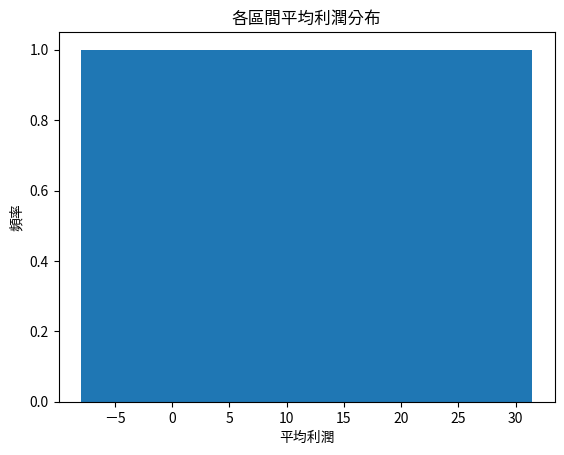

In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_stock_data(ticker, period="5y"):
    """
    獲取股票歷史數據

    Args:
        ticker (str): 股票代碼
        period (str, optional): 獲取數據的時間範圍. Defaults to "5y".

    Returns:
        pd.DataFrame: 股票歷史數據
    """
    ticker = yf.Ticker(ticker)
    hist = ticker.history(period=period)
    return hist

def calculate_intervals(data, m=5):
    """
    計算股價區間

    Args:
        data (pd.DataFrame): 股票歷史數據
        m (int, optional): 區間數量. Defaults to 5.

    Returns:
        list: 股價區間列表
    """
    max_price = data['High'].max()
    min_price = data['Low'].min()
    interval_length = (max_price - min_price) / m
    intervals = [(min_price + i * interval_length, min_price + (i + 1) * interval_length) for i in range(m)]
    return intervals

def calculate_profit(data, h_time=10, transaction_cost=0.001):
    """
    計算買賣價和利潤

    Args:
        data (pd.DataFrame): 股票歷史數據
        h_time (int, optional): 持有天數. Defaults to 10.
        transaction_cost (float, optional): 交易成本. Defaults to 0.001.

    Returns:
        list: 買賣價序對
        list: 利潤序對
    """
    buy_sell_pairs = [(data['Close'].iloc[i], data['Close'].iloc[i + h_time]) for i in range(len(data) - h_time)]
    profit_pairs = [(buy, sell - buy - transaction_cost) for buy, sell in buy_sell_pairs]
    return buy_sell_pairs, profit_pairs

def analyze_profit_by_interval(data, intervals, profit_pairs, target_profit=0.8, alpha=0.6):
    """
    按區間分析利潤

    Args:
        data (pd.DataFrame): 股票歷史數據
        intervals (list): 股價區間列表
        profit_pairs (list): 利潤序對
        target_profit (float, optional): 目標利潤. Defaults to 0.8.
        alpha (float, optional): 獲利機率閾值. Defaults to 0.6.

    Returns:
        list: 各區間的交易資訊
    """
    profit_interval_dict = {interval: [] for interval in intervals}

    for buy, profit in profit_pairs:
        for interval in intervals:
            if interval[0] <= buy < interval[1]:
                profit_interval_dict[interval].append(profit)
                break

    price_interval_trading_info = []
    for interval, profits in profit_interval_dict.items():
        if profits:
            avg_profit = sum(profits) / len(profits)
            t_profit_prob = sum(1 for profit in profits if profit >= target_profit) / len(profits)
            signal = "買入訊號" if t_profit_prob >= alpha else "賣出訊號"
            price_interval_trading_info.append((interval, avg_profit, t_profit_prob, signal))

    return price_interval_trading_info

# 主程式
ticker_symbol = "2330.TW"
data = get_stock_data(ticker_symbol)
intervals = calculate_intervals(data)
buy_sell_pairs, profit_pairs = calculate_profit(data)
trading_info = analyze_profit_by_interval(data, intervals, profit_pairs)

# 打印結果
for info in trading_info:
    print(info)

# 可視化
plt.hist([p[1] for p in trading_info], bins=len(intervals))
plt.xlabel('平均利潤')
plt.ylabel('頻率')
plt.title('各區間平均利潤分布')
plt.show()

# 步驟七：產生交易策略

In [26]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")
max_price = hist['High'].max()
min_price = hist['Low'].min()
print(f"最大股價: {max_price}, 最小股價: {min_price}")

# 計算區間
m = 5  # 區間數量
interval_length = (max_price - min_price) / m
intervals = [(min_price + i * interval_length, min_price + (i + 1) * interval_length) for i in range(m)]
print(f"股價區間: {intervals}")

# 計算買賣價序對
h_time = 10  # 買入後持有的天數
buy_sell_pairs = [(hist['Close'].iloc[i], hist['Close'].iloc[i + h_time]) for i in range(len(hist) - h_time)]
print(f"買賣價序對: {buy_sell_pairs}")

# 計算利潤序對
profit_pairs = [(buy, sell - buy) for buy, sell in buy_sell_pairs]
print(f"利潤序對: {profit_pairs}")

# 計算利潤區間序對並聚集相同區間的利潤
profit_interval_dict = {interval: [] for interval in intervals}

for buy, profit in profit_pairs:
    for interval in intervals:
        if interval[0] <= buy < interval[1]:
            profit_interval_dict[interval].append(profit)
            break

# 計算每個區間的平均利潤和獲利機率
target_profit = 0.8 * interval_length
alpha = 0.6
price_interval_trading_info = []

for interval, profits in profit_interval_dict.items():
    if profits:
        avg_profit = sum(profits) / len(profits)
        t_profit_prob = sum(1 for profit in profits if profit >= target_profit) / len(profits)
        signal = "buySignal" if t_profit_prob >= alpha else "sellSignal"
        price_interval_trading_info.append((interval, avg_profit, t_profit_prob, signal))

# 產生交易規則
trading_rules = []

for info in price_interval_trading_info:
    interval, _, _, signal = info
    if signal == "buySignal":
        # 產生買進規則
        buy_rule = f"股價介在{interval[0]}-{interval[1]}買進股票"
        # 產生停損規則
        stop_loss_rule = f"股價低於{interval[0]}-{interval[1]}-{0.2*interval[0]}賣出股票"
        trading_rules.append((buy_rule, stop_loss_rule))
    elif signal == "sellSignal":
        # 產生賣出規則
        sell_rule = f"股價介在{interval[0]}-{interval[1]}賣出股票"
        trading_rules.append((sell_rule,))

# 打印交易規則
for i, rule in enumerate(trading_rules):
    print(f"交易規則{i+1}:")
    if len(rule) == 2:
        buy_rule, stop_loss_rule = rule
        print(f"  {buy_rule}")
        print(f"  {stop_loss_rule}")
    else:
        sell_rule = rule[0]
        print(f"  {sell_rule}")

最大股價: 1160.0, 最小股價: 332.2955355618169
股價區間: [(332.2955355618169, 497.83642844945354), (497.83642844945354, 663.3773213370902), (663.3773213370902, 828.9182142247269), (828.9182142247269, 994.4591071123634), (994.4591071123634, 1160.0)]
買賣價序對: [(np.float64(335.50390625), np.float64(381.3377990722656)), (np.float64(351.0874328613281), np.float64(390.0462646484375)), (np.float64(352.00408935546875), np.float64(393.2546081542969)), (np.float64(349.7123718261719), np.float64(398.7546081542969)), (np.float64(353.8374328613281), np.float64(396.92132568359375)), (np.float64(389.1294860839844), np.float64(399.2129211425781)), (np.float64(398.7546081542969), np.float64(393.2546081542969)), (np.float64(386.8378601074219), np.float64(384.0877990722656)), (np.float64(397.8380126953125), np.float64(393.2546081542969)), (np.float64(390.0462646484375), np.float64(391.42120361328125)), (np.float64(381.3377990722656), np.float64(398.7546081542969)), (np.float64(390.0462646484375), np.float64(396.9213256

In [27]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")
max_price = hist['High'].max()
min_price = hist['Low'].min()

# 計算區間
m = 5  # 區間數量
interval_length = (max_price - min_price) / m
intervals = [(min_price + i * interval_length, min_price + (i + 1) * interval_length) for i in range(m)]

# 計算買賣價序對
h_time = 10  # 買入後持有的天數
buy_sell_pairs = [(hist['Close'].iloc[i], hist['Close'].iloc[i + h_time]) for i in range(len(hist) - h_time)]

# 計算利潤序對
profit_pairs = [(buy, sell - buy) for buy, sell in buy_sell_pairs]

# 計算利潤區間序對並聚集相同區間的利潤
profit_interval_dict = {interval: [] for interval in intervals}
for buy, profit in profit_pairs:
    for interval in intervals:
        if interval[0] <= buy < interval[1]:
            profit_interval_dict[interval].append(profit)
            break

# 計算每個區間的平均利潤和獲利機率
target_profit = 0.8 * interval_length
alpha = 0.6
price_interval_trading_info = []
for interval, profits in profit_interval_dict.items():
    if profits:
        avg_profit = sum(profits) / len(profits)
        t_profit_prob = sum(1 for profit in profits if profit >= target_profit) / len(profits)
        signal = "buySignal" if t_profit_prob >= alpha else "sellSignal"
        price_interval_trading_info.append((interval, avg_profit, t_profit_prob, signal))

# 產生交易規則
trading_rules = []
for info in price_interval_trading_info:
    interval, _, _, signal = info
    if signal == "buySignal":
        buy_rule = f"股價介在{interval[0]}-{interval[1]}買進股票"
        stop_loss_rule = f"股價低於{interval[0]}-{interval[1]}-{0.2*interval[0]}賣出股票"
        trading_rules.append((buy_rule, stop_loss_rule))
    elif signal == "sellSignal":
        sell_rule = f"股價介在{interval[0]}-{interval[1]}賣出股票"
        trading_rules.append((sell_rule,))

# 打印交易規則
for i, rule in enumerate(trading_rules):
    print(f"交易規則{i+1}:")
    if len(rule) == 2:
        buy_rule, stop_loss_rule = rule
        print(f"  {buy_rule}")
        print(f"  {stop_loss_rule}")
    else:
        sell_rule = rule[0]
        print(f"  {sell_rule}")

交易規則1:
  股價介在332.2955355618169-497.83642844945354賣出股票
交易規則2:
  股價介在497.83642844945354-663.3773213370902賣出股票
交易規則3:
  股價介在663.3773213370902-828.9182142247269賣出股票
交易規則4:
  股價介在828.9182142247269-994.4591071123634賣出股票
交易規則5:
  股價介在994.4591071123634-1160.0賣出股票


In [28]:
!pip install backtesting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.4/191.4 kB 3.4 MB/s eta 0:00:00


In [29]:
import yfinance as yf
import pandas as pd
import numpy as np
from backtesting import Strategy, Backtest

class MA_BollingerStrategy(Strategy):
    n_fast = 10  # Fast MA period
    n_slow = 30  # Slow MA period
    boll_window = 20  # Bollinger Bands window
    boll_std = 2  # Bollinger Bands standard deviation

    def init(self):
        # Convert Close prices to a Pandas Series before applying rolling
        close_prices = pd.Series(self.data.Close)
        self.fast_ma = self.I(close_prices.rolling(self.n_fast).mean)
        self.slow_ma = self.I(close_prices.rolling(self.n_slow).mean)
        self.boll_mid = self.I(close_prices.rolling(self.boll_window).mean)
        self.boll_upper = self.boll_mid + self.boll_std * self.I(close_prices.rolling(self.boll_window).std)
        self.boll_lower = self.boll_mid - self.boll_std * self.I(close_prices.rolling(self.boll_window).std)

    def next(self):
        if not self.position:
            if self.fast_ma[-1] > self.slow_ma[-1] and self.data.Close[-1] > self.boll_mid[-1]:
                self.buy()
        elif self.fast_ma[-1] < self.slow_ma[-1] or self.data.Close[-1] < self.boll_lower[-1]:
            self.position.close()

# Fetch data
ticker = yf.Ticker('AAPL')
data = ticker.history(start='2015-01-01', end='2022-12-31')

# Backtest
bt = Backtest(data, MA_BollingerStrategy, cash=10000, commission=0, exclusive_orders=True)
stats = bt.run()
print(stats)

/usr/local/lib/python3.11/dist-packages/backtesting/_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Start                     2015-01-02 00:00...
End                       2022-12-30 00:00...
Duration                   2919 days 00:00:00
Exposure Time [%]                    62.01589
Equity Final [$]                  32874.47738
Equity Peak [$]                   39129.04585
Return [%]                          228.74477
Buy & Hold Return [%]               352.55277
Return (Ann.) [%]                    16.05705
Volatility (Ann.) [%]                22.81771
CAGR [%]                              10.8207
Sharpe Ratio                          0.70371
Sortino Ratio                         1.23061
Calmar Ratio                          0.49968
Alpha [%]                              80.319
Beta                                    0.421
Max. Drawdown [%]                   -32.13496
Avg. Drawdown [%]                    -3.68181
Max. Drawdown Duration      851 days 00:00:00
Avg. Drawdown Duration       52 days 00:00:00
# Trades                                   34
Win Rate [%]                      

In [30]:
import yfinance as yf

# 下載台積電的歷史股價資料
ticker_symbol = "2330.TW"
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(period="5y")
max_price = hist['High'].max()
min_price = hist['Low'].min()

# 計算區間
m = 5  # 區間數量
interval_length = (max_price - min_price) / m
intervals = [(min_price + i * interval_length, min_price + (i + 1) * interval_length) for i in range(m)]

# 計算買賣價序對
h_time = 10  # 買入後持有的天數
buy_sell_pairs = [(hist['Close'].iloc[i], hist['Close'].iloc[i + h_time]) for i in range(len(hist) - h_time)]

# 計算利潤序對
profit_pairs = [(buy, sell - buy) for buy, sell in buy_sell_pairs]

# 計算利潤區間序對並聚集相同區間的利潤
profit_interval_dict = {interval: [] for interval in intervals}
for buy, profit in profit_pairs:
    for interval in intervals:
        if interval[0] <= buy < interval[1]:
            profit_interval_dict[interval].append(profit)
            break

# 計算每個區間的平均利潤和獲利機率
target_profit = 0.8 * interval_length
alpha = 0.6
price_interval_trading_info = []
for interval, profits in profit_interval_dict.items():
    if profits:
        avg_profit = sum(profits) / len(profits)
        t_profit_prob = sum(1 for profit in profits if profit >= target_profit) / len(profits)
        signal = "buySignal" if t_profit_prob >= alpha else "sellSignal"
        price_interval_trading_info.append((interval, avg_profit, t_profit_prob, signal))

# 產生交易規則
trading_rules = []
for info in price_interval_trading_info:
    interval, _, _, signal = info
    if signal == "buySignal":
        buy_rule = f"股價介在{interval[0]}-{interval[1]}買進股票"
        stop_loss_rule = f"股價低於{interval[0]}-{interval[1]}-{0.2*interval[0]}賣出股票"
        trading_rules.append((buy_rule, stop_loss_rule))
    elif signal == "sellSignal":
        sell_rule = f"股價介在{interval[0]}-{interval[1]}賣出股票"
        trading_rules.append((sell_rule,))

# 打印交易規則
for i, rule in enumerate(trading_rules):
    print(f"交易規則{i+1}:")
    if len(rule) == 2:
        buy_rule, stop_loss_rule = rule
        print(f"  {buy_rule}")
        print(f"  {stop_loss_rule}")
    else:
        sell_rule = rule[0]
        print(f"  {sell_rule}")

交易規則1:
  股價介在332.2955355618169-497.83642844945354賣出股票
交易規則2:
  股價介在497.83642844945354-663.3773213370902賣出股票
交易規則3:
  股價介在663.3773213370902-828.9182142247269賣出股票
交易規則4:
  股價介在828.9182142247269-994.4591071123634賣出股票
交易規則5:
  股價介在994.4591071123634-1160.0賣出股票
